In [ ]:
import pandas as pd

df_2013 = pd.read_csv("../data/creditcard.csv")
df_2013

In [ ]:
# Initial inspection
print("Dataset Shape:", df_2013.shape)
print("\nFirst Few Rows:")
print(df_2013.head())
print("\nData Info:")
print(df_2013.info())
print("\nSummary Statistics:")
print(df_2013.describe())
print("\nMissing Values:")
print(df_2013.isnull().sum())

In [ ]:
# Load 2023 dataset
df_2023 = pd.read_csv('../data/creditcard_2023.csv')

# Initial inspection
print("Dataset Shape:", df_2023.shape)
print("\nFirst Few Rows:")
print(df_2023.head())
print("\nData Info:")
print(df_2023.info())
print("\nSummary Statistics:")
print(df_2023.describe())
print("\nMissing Values:")
print(df_2023.isnull().sum())

In [ ]:
import matplotlib.pyplot as plt

df_2013['Class'].value_counts().plot(kind='bar', title='Class Distribution (2013)')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.show()

df_2023['Class'].value_counts().plot(kind='bar', title='Class Distribution (2023)')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Count')
plt.show()

### Exploratory Data Analysis

Importing Necessary Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # For the statistical test
import os

In [2]:
# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
os.makedirs('figures', exist_ok=True)  # Create figures directory for saving plots

In [3]:
# --- 1. Load the Dataset ---
print("--- 1. Loading Dataset ---")
file_path = '../data/creditcard.csv'
try:
    df_2013 = pd.read_csv(file_path)
    print(f"Dataset '{file_path}' loaded successfully.")
    print("First 5 Rows of the Dataset:")
    print(df_2013.head())
except FileNotFoundError:
    print(f"Error: Dataset not found at {file_path}. Please check the path and ensure it's in the 'data/' directory.")
    exit() # Exit if the file is not found, as we cannot proceed

print("\n" + "="*80 + "\n") # Separator for clarity


--- 1. Loading Dataset ---
Dataset '../data/creditcard.csv' loaded successfully.
First 5 Rows of the Dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -

Initial Data Inspection

In [4]:
# --- 2. Initial Data Inspection ---
print("--- 2. Initial Data Inspection ---")
print("Dataset Shape:", df_2013.shape)
print("\nData Information (Columns, Non-Null Count, Dtype):")
df_2013.info() # No need for print() as .info() prints directly
print("\nSummary Statistics (Descriptive Statistics):")
print(df_2013.describe())
print("\nMissing Values (Count per column):")
print(df_2013.isnull().sum())

print("\nInsight: No missing values, which simplifies preprocessing. All features are numerical.")

print("\n" + "="*80 + "\n")

--- 2. Initial Data Inspection ---
Dataset Shape: (284807, 31)

Data Information (Columns, Non-Null Count, Dtype):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     2

Class Imbalance Analysis

In [5]:
# --- 3. Class Imbalance Analysis ---
print("--- 3. Class Imbalance Analysis ---")
class_counts = df_2013['Class'].value_counts()
print("Distribution of 'Class' (0: Legitimate, 1: Fraud):")
print(class_counts)
print("\nPercentage of 'Class' (0: Legitimate, 1: Fraud):")
print(df_2013['Class'].value_counts(normalize=True) * 100)

--- 3. Class Imbalance Analysis ---
Distribution of 'Class' (0: Legitimate, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of 'Class' (0: Legitimate, 1: Fraud):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


C:\Users\PAVITHRAN\AppData\Local\Temp\ipykernel_25580\984061417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_2013, palette='viridis')


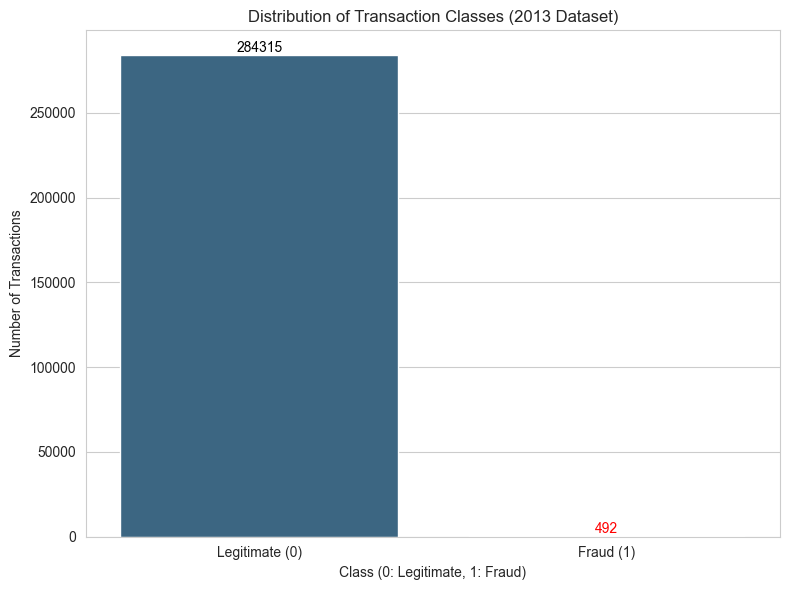

In [6]:
# Visualize Class Distribution (Standard Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_2013, palette='viridis')
plt.title('Distribution of Transaction Classes (2013 Dataset)')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraud (1)'])
# Add text labels for counts
plt.text(0, class_counts[0], f'{class_counts[0]}', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, class_counts[1], f'{class_counts[1]}', ha='center', va='bottom', color='red', fontsize=10)
plt.tight_layout()
plt.savefig('figures/class_distribution_2013.png')
plt.show()

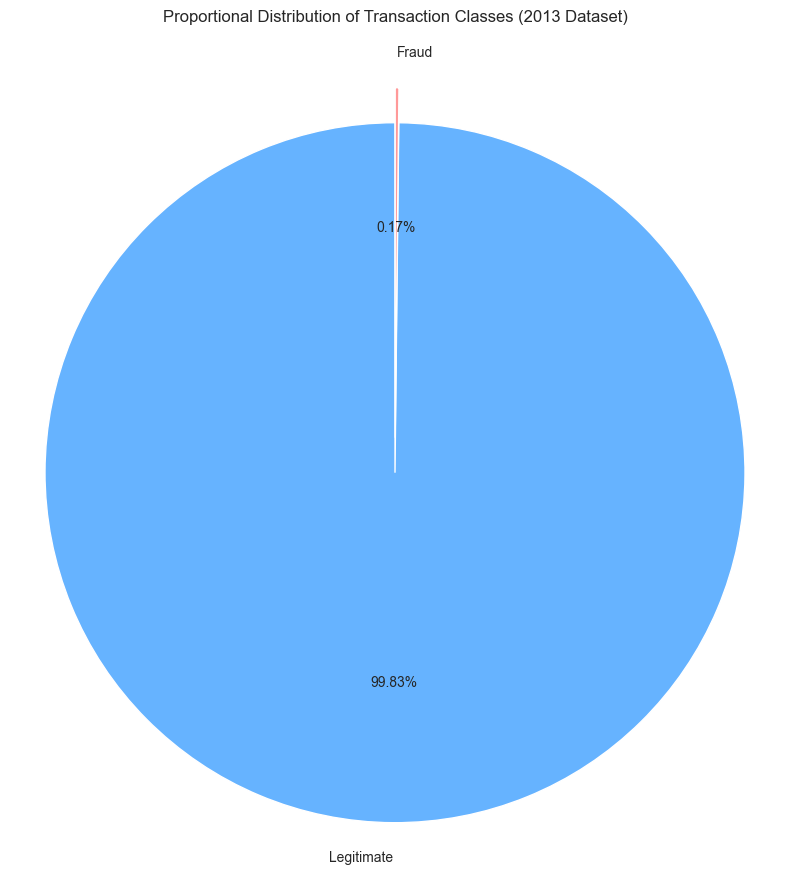

In [7]:
# Visualize Class Distribution (Pie Chart)
plt.figure(figsize=(8, 9))
plt.pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
        colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0, 0.1)) # Explode fraud slice
plt.title('Proportional Distribution of Transaction Classes (2013 Dataset)')
plt.axis('equal') # Equal aspect ratio ensures a circular pie
plt.tight_layout()
plt.savefig('figures/class_pie_2013.png')
plt.show()

C:\Users\PAVITHRAN\AppData\Local\Temp\ipykernel_25580\3239037526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


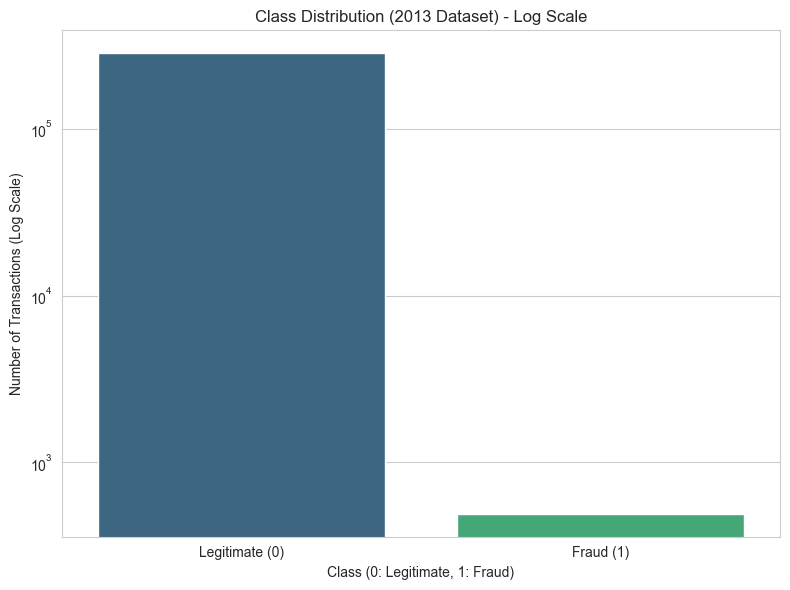


Insight: The dataset exhibits extreme class imbalance, with fraud transactions making up a very small percentage (0.172%) of the total. This is the primary challenge for this project phase.




In [8]:
# Visualize Class Distribution (Log Scale Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution (2013 Dataset) - Log Scale')
plt.xlabel('Class (0: Legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions (Log Scale)')
plt.xticks(ticks=[0, 1], labels=['Legitimate (0)', 'Fraud (1)'])
plt.yscale('log') # Logarithmic scale to make fraud count visible
plt.tight_layout()
plt.savefig('figures/class_distribution_log_scale_2013.png')
plt.show()
print("\nInsight: The dataset exhibits extreme class imbalance, with fraud transactions making up a very small percentage (0.172%) of the total. This is the primary challenge for this project phase.")

print("\n" + "="*80 + "\n")

Distribution Analysis of 'Time' and 'Amount'

--- 4. Distribution Analysis of 'Time' and 'Amount' ---


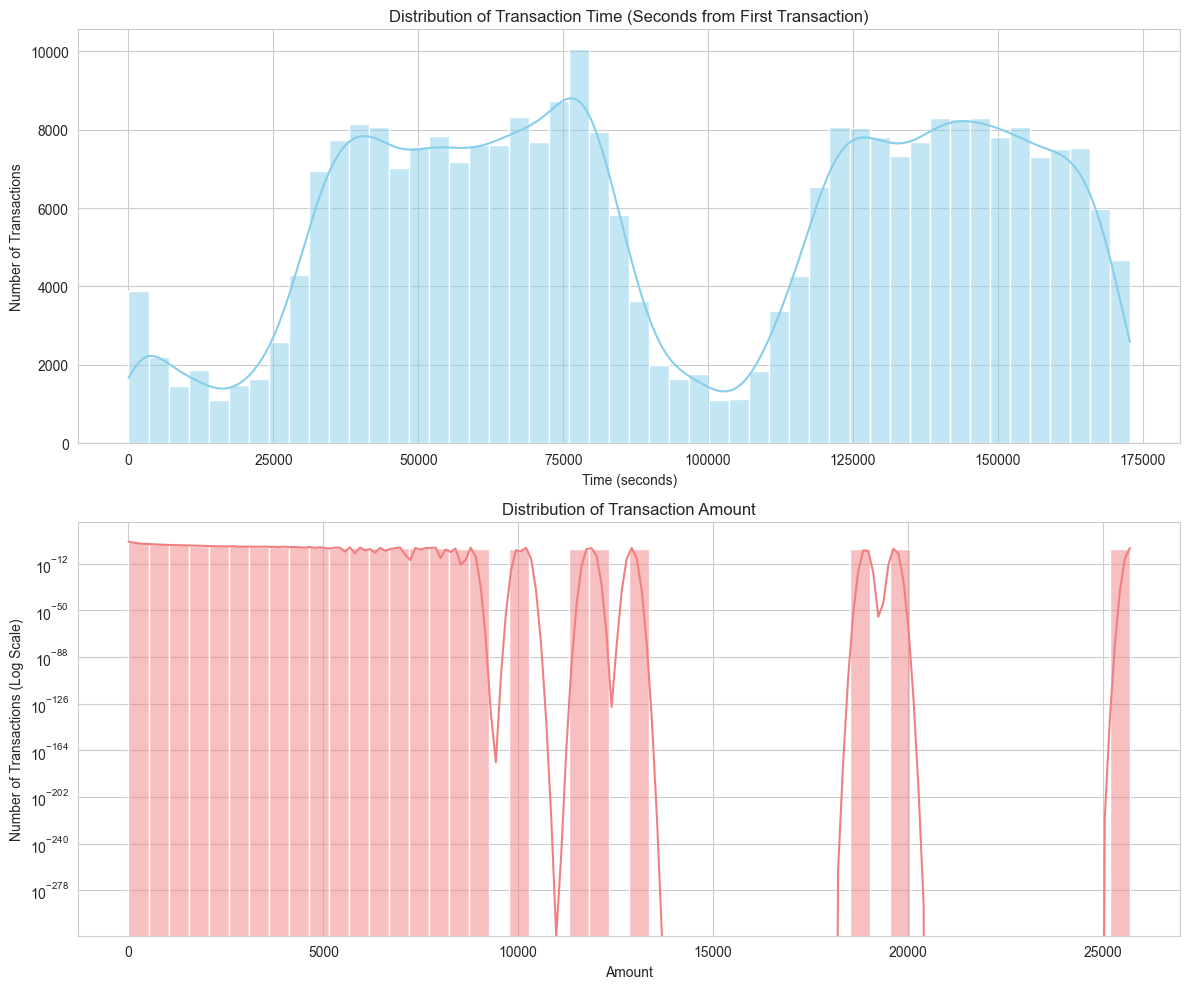


Insight: 'Time' shows two peaks, indicating distinct transaction periods within the 2-day window. 'Amount' is highly skewed towards smaller values, suggesting most transactions are of low value.


In [9]:
# --- 4. Distribution Analysis of 'Time' and 'Amount' ---
print("--- 4. Distribution Analysis of 'Time' and 'Amount' ---")

# Histograms for Time and Amount
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

sns.histplot(df_2013['Time'], bins=50, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of Transaction Time (Seconds from First Transaction)')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Number of Transactions')
axes[0].grid(True)

sns.histplot(df_2013['Amount'], bins=50, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Distribution of Transaction Amount')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Number of Transactions (Log Scale)')
axes[1].set_yscale('log') # Use log scale due to heavy right skew
axes[1].grid(True)
plt.tight_layout()
plt.savefig('figures/time_and_amount_histogram_2013.png')
plt.show()

print("\nInsight: 'Time' shows two peaks, indicating distinct transaction periods within the 2-day window. 'Amount' is highly skewed towards smaller values, suggesting most transactions are of low value.")


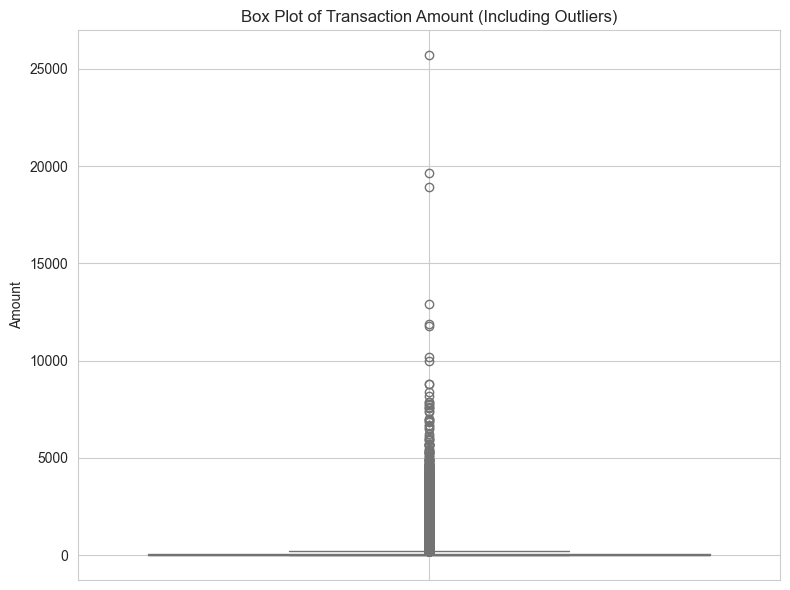


Insight: The box plot confirms numerous outliers in 'Amount', indicating very large transactions.


In [10]:
# Box Plot for 'Amount' (to visualize outliers)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_2013['Amount'], color='lightgreen')
plt.title('Box Plot of Transaction Amount (Including Outliers)')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/amount_box_plot_2013.png')
plt.show()
print("\nInsight: The box plot confirms numerous outliers in 'Amount', indicating very large transactions.")


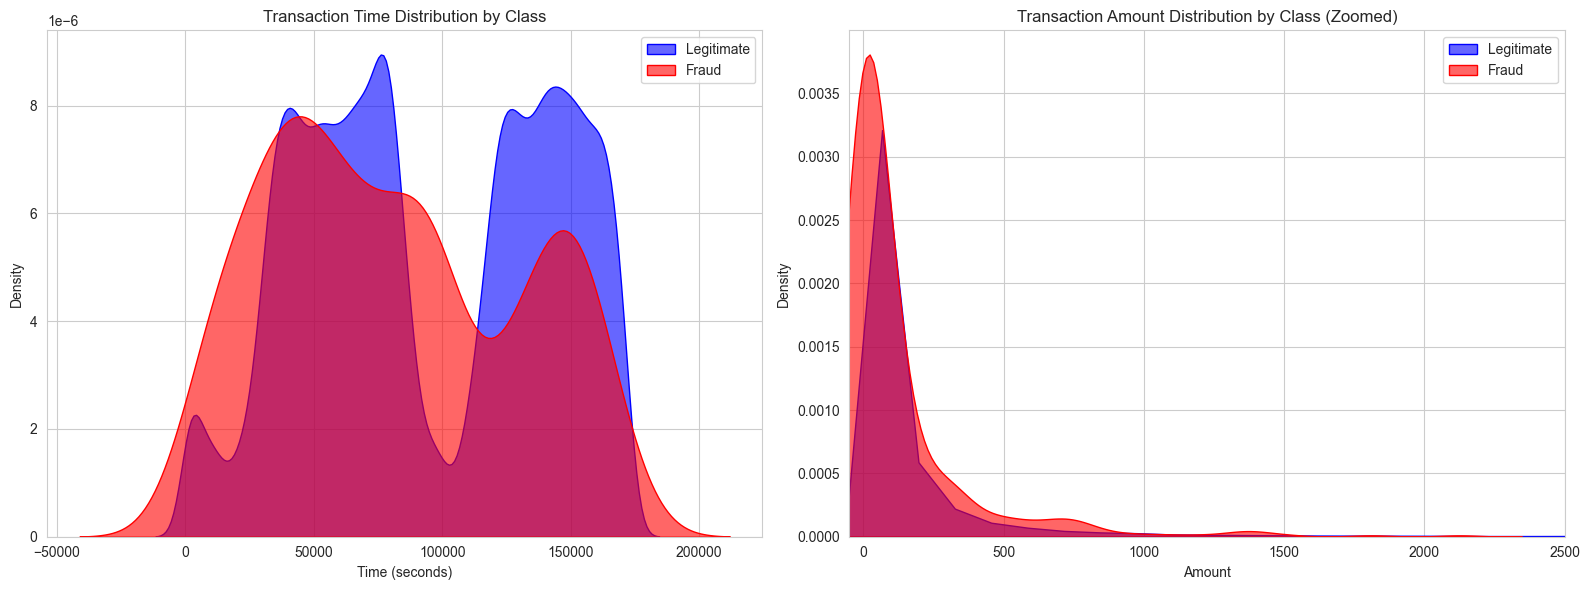


Insight: Fraudulent transactions seem to occur more frequently during certain time windows (dips in legitimate activity). Fraudulent transactions generally involve smaller amounts, but with a tail of larger fraudulent transactions.




In [11]:
# Compare 'Time' and 'Amount' Distributions for Fraud vs. Non-Fraud
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Time vs. Class (Density Plot)
sns.kdeplot(data=df_2013[df_2013['Class'] == 0]['Time'], label='Legitimate', fill=True, ax=axes[0], color='blue', alpha=0.6)
sns.kdeplot(data=df_2013[df_2013['Class'] == 1]['Time'], label='Fraud', fill=True, ax=axes[0], color='red', alpha=0.6)
axes[0].set_title('Transaction Time Distribution by Class')
axes[0].set_xlabel('Time (seconds)')
axes[0].set_ylabel('Density')
axes[0].legend()
axes[0].grid(True)

# Amount vs. Class (Density Plot, zoomed in)
sns.kdeplot(data=df_2013[df_2013['Class'] == 0]['Amount'], label='Legitimate', fill=True, ax=axes[1], color='blue', alpha=0.6)
sns.kdeplot(data=df_2013[df_2013['Class'] == 1]['Amount'], label='Fraud', fill=True, ax=axes[1], color='red', alpha=0.6)
axes[1].set_title('Transaction Amount Distribution by Class (Zoomed)')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Density')
axes[1].set_xlim(-50, 2500) # Zoom in to focus on lower amount ranges
axes[1].legend()
axes[1].grid(True)
plt.tight_layout()
plt.savefig('figures/time_and_amount_kde_2013')
plt.show()

print("\nInsight: Fraudulent transactions seem to occur more frequently during certain time windows (dips in legitimate activity). Fraudulent transactions generally involve smaller amounts, but with a tail of larger fraudulent transactions.")

print("\n" + "="*80 + "\n")

Distribution Analysis of PCA Components (V1-V28)

--- 5. Distribution Analysis of PCA Components (V1-V28) ---


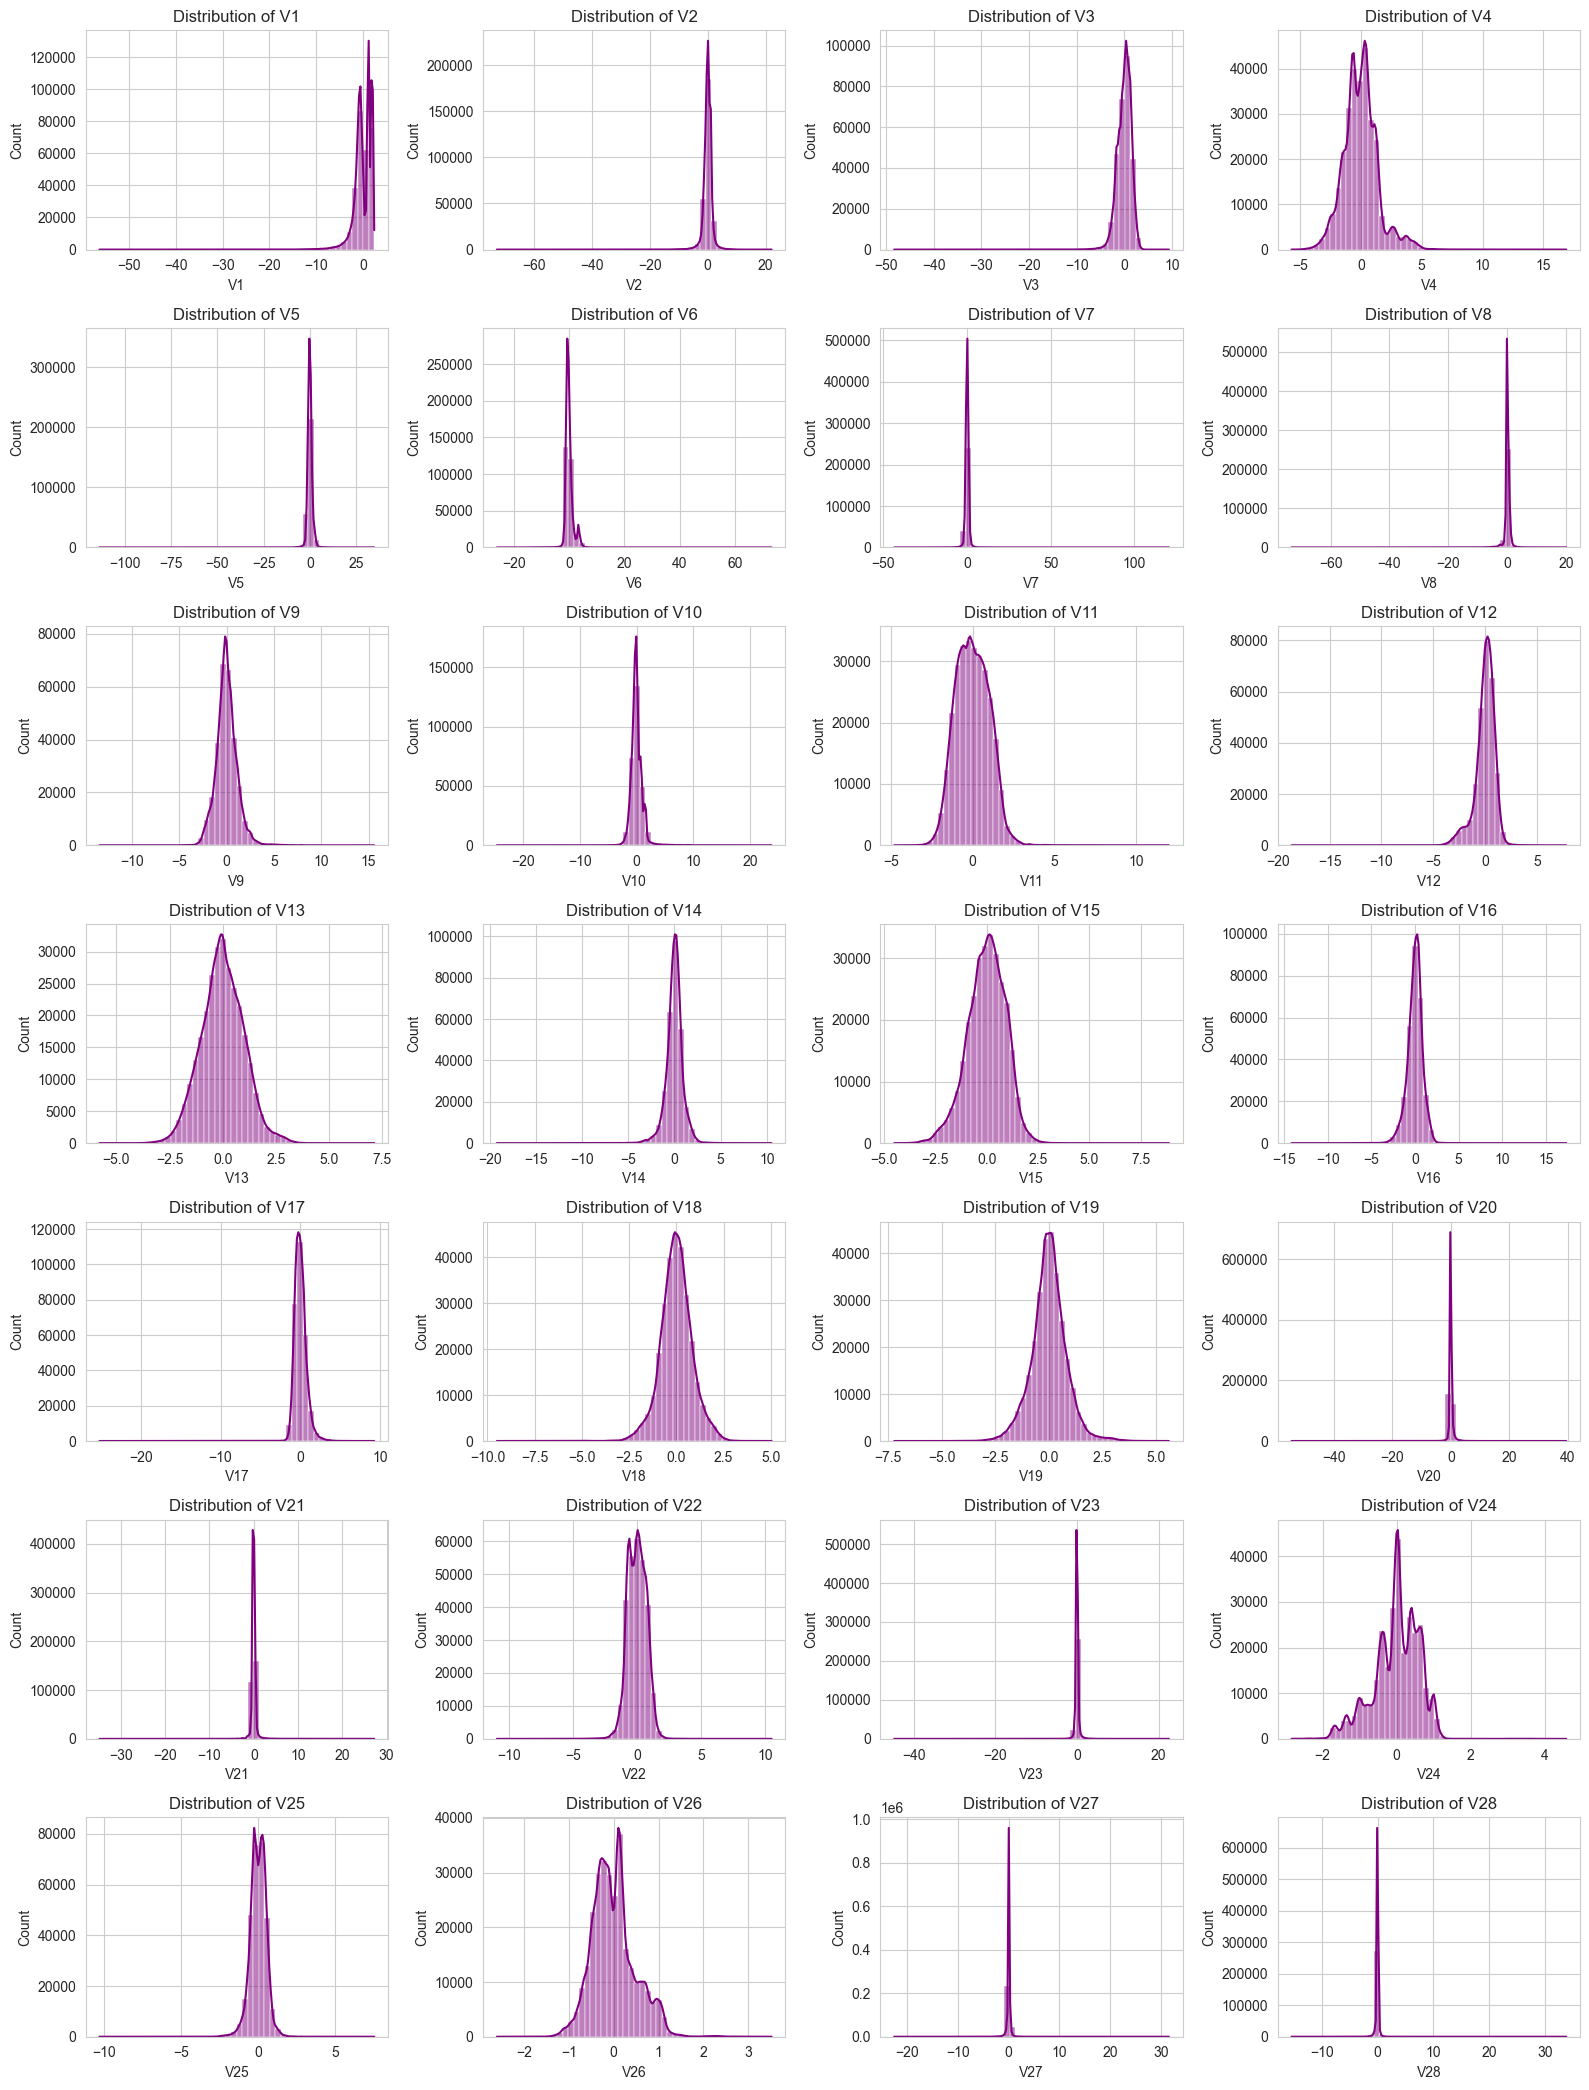


Insight: Most PCA features exhibit a Gaussian-like distribution centered around zero, which is typical after standardization and PCA transformation.


In [12]:
# --- 5. Distribution Analysis of PCA Components (V1-V28) ---
print("--- 5. Distribution Analysis of PCA Components (V1-V28) ---")
# Select a subset of V features for detailed visualization
# These are often highlighted as important in research papers or through initial correlation.
# Feel free to adjust this list.
v_features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                      'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                      'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] # Plotting all V features

# Plotting individual distributions for all V features
num_cols = 4
num_rows = int(np.ceil(len(v_features_to_plot) / num_cols))
plt.figure(figsize=(num_cols * 4, num_rows * 3)) # Adjust figure size dynamically

for i, col in enumerate(v_features_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_2013[col], bins=50, kde=True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v_features_histogram_2013.png')
plt.show()
print("\nInsight: Most PCA features exhibit a Gaussian-like distribution centered around zero, which is typical after standardization and PCA transformation.")


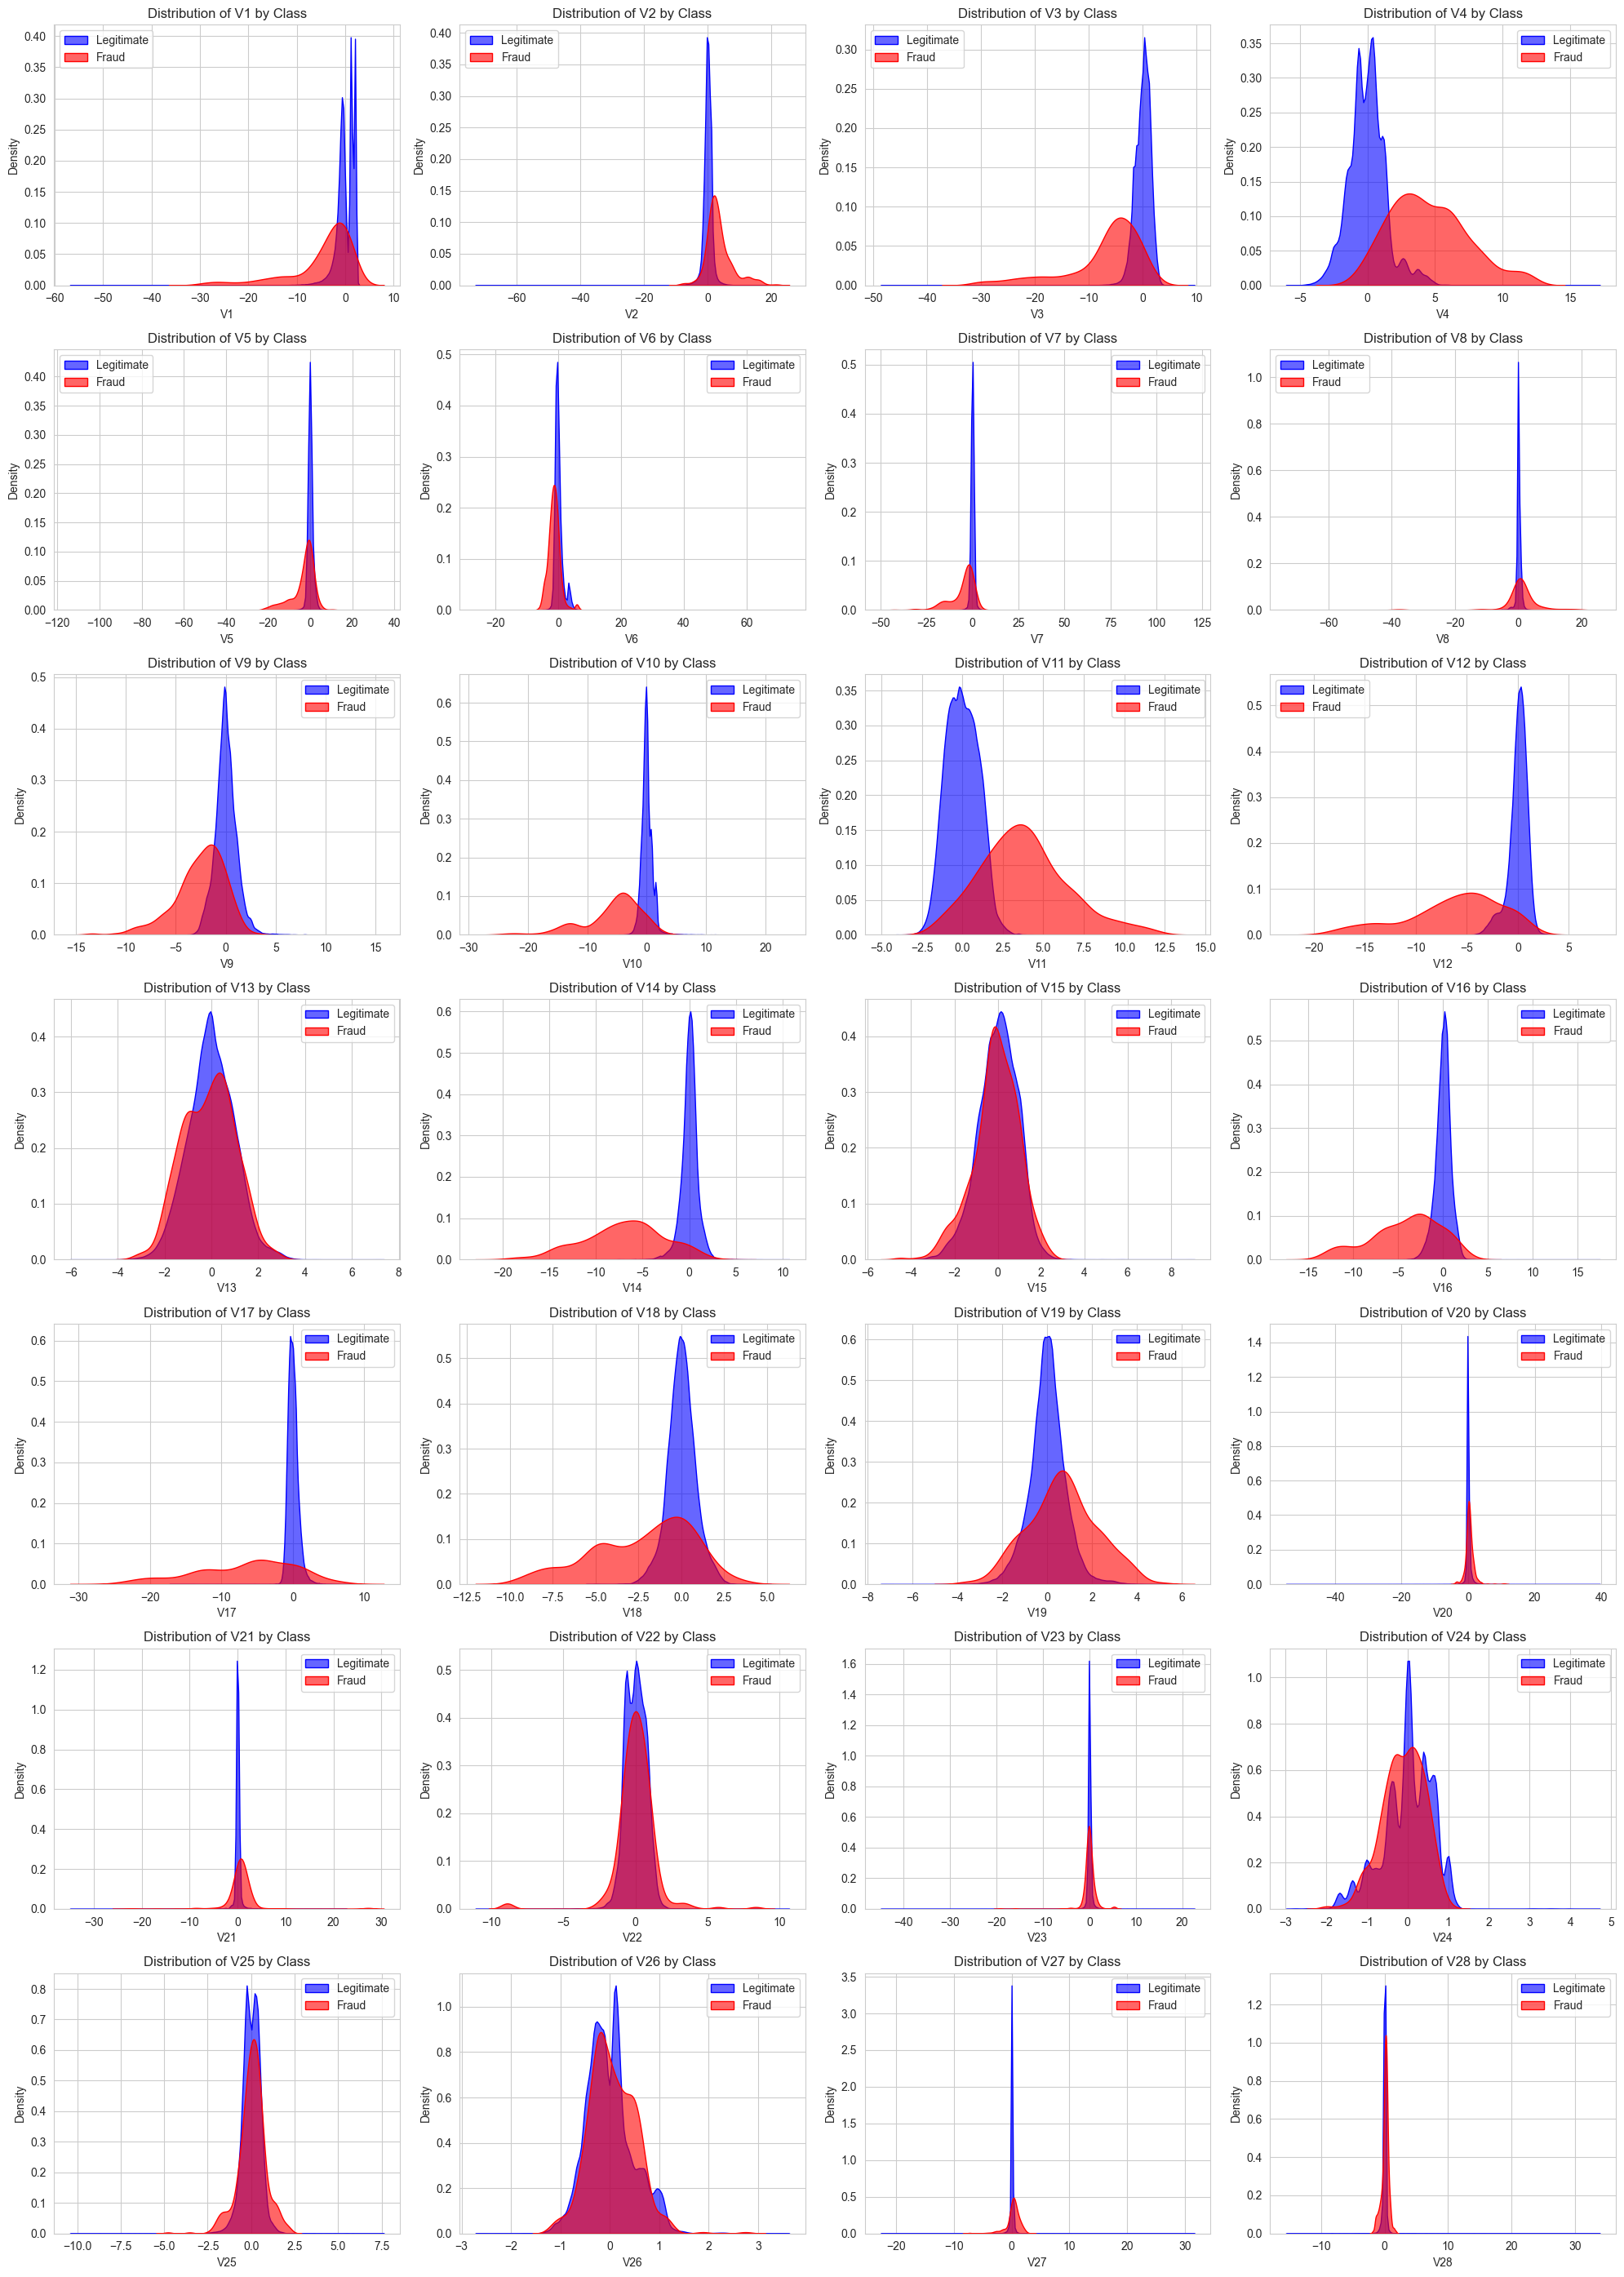


Insight: Some PCA features (e.g., V4, V10, V12, V14, V16, V17) show clear distinctions between legitimate and fraudulent transactions, indicating their importance for classification.




In [13]:
# Compare V features for Fraud vs. Non-Fraud (Density Plots)
# Focus on the most commonly impactful V features for visual comparison
v_features_for_comparison = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                            'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'] # Plot all for thoroughness

num_cols_comp = 4
num_rows_comp = int(np.ceil(len(v_features_for_comparison) / num_cols_comp))
plt.figure(figsize=(num_cols_comp * 5, num_rows_comp * 4)) # Adjust figure size

for i, col in enumerate(v_features_for_comparison):
    plt.subplot(num_rows_comp, num_cols_comp, i + 1)
    sns.kdeplot(data=df_2013[df_2013['Class'] == 0][col], label='Legitimate', fill=True, color='blue', alpha=0.6)
    sns.kdeplot(data=df_2013[df_2013['Class'] == 1][col], label='Fraud', fill=True, color='red', alpha=0.6)
    plt.title(f'Distribution of {col} by Class')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.savefig('figures/v_features_kde_2013.png')
plt.show()
print("\nInsight: Some PCA features (e.g., V4, V10, V12, V14, V16, V17) show clear distinctions between legitimate and fraudulent transactions, indicating their importance for classification.")


print("\n" + "="*80 + "\n")

Correlation Analysis

--- 6. Correlation Analysis ---


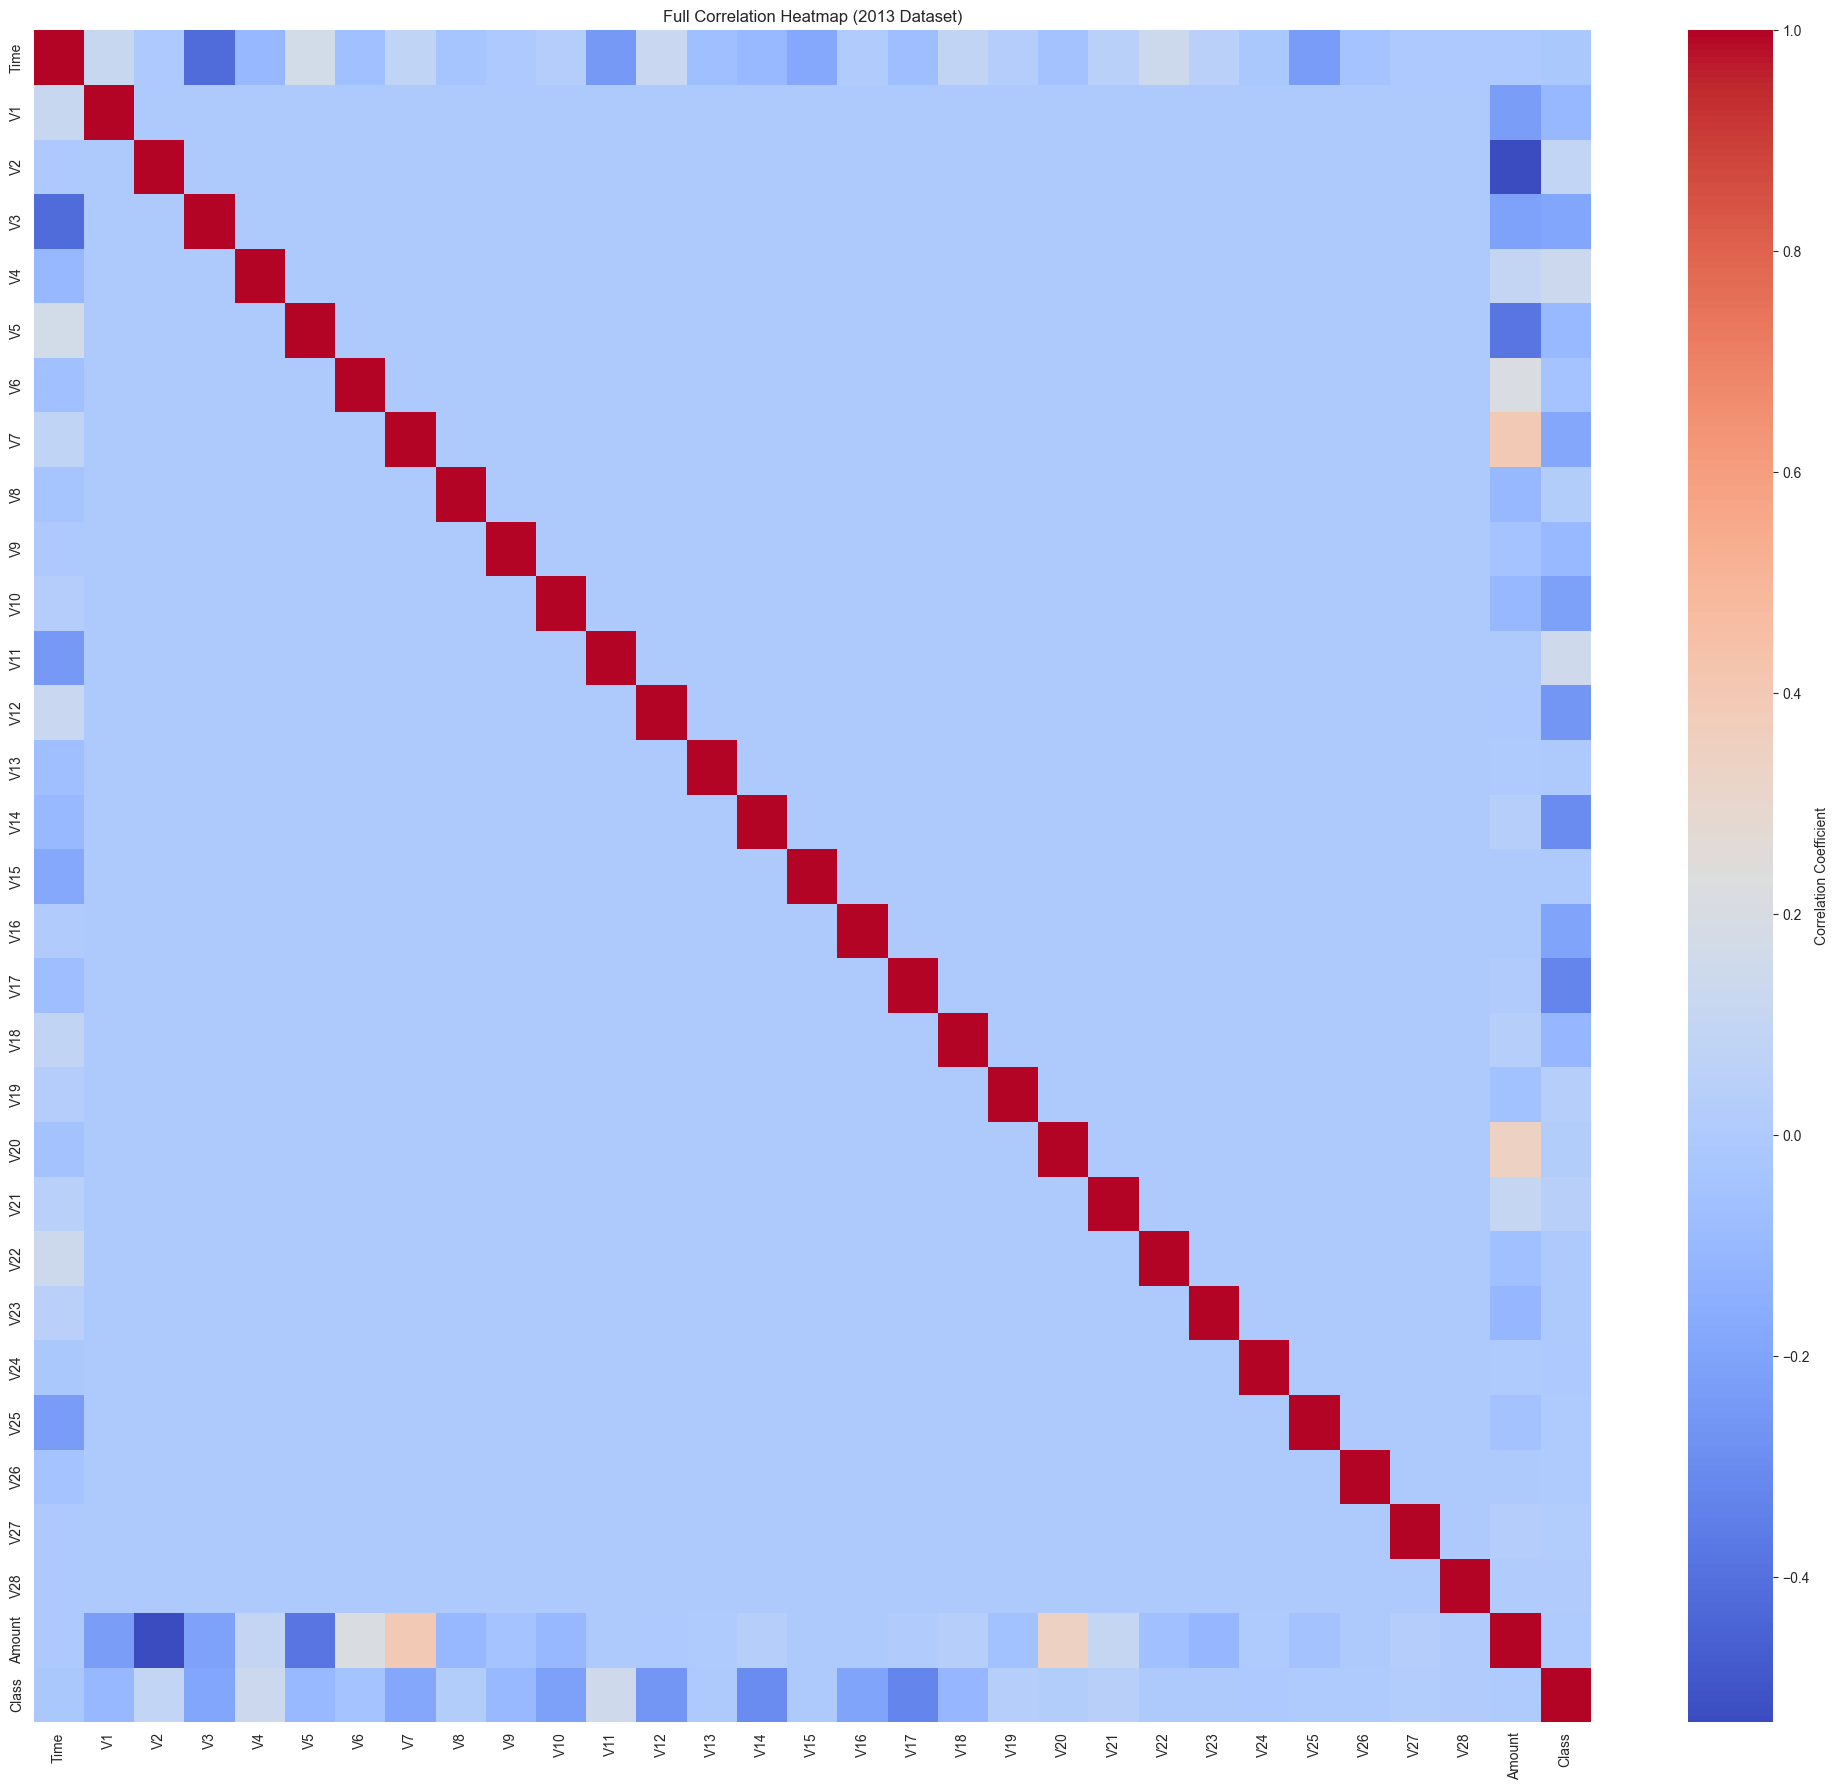

In [14]:
# --- 6. Correlation Analysis ---
print("--- 6. Correlation Analysis ---")

# Compute full correlation matrix
full_correlation_matrix = df_2013.corr()

# Plot heatmap of full correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(full_correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Full Correlation Heatmap (2013 Dataset)')
plt.tight_layout()
plt.savefig('figures/correlation_matrix_2013.png')
plt.show()

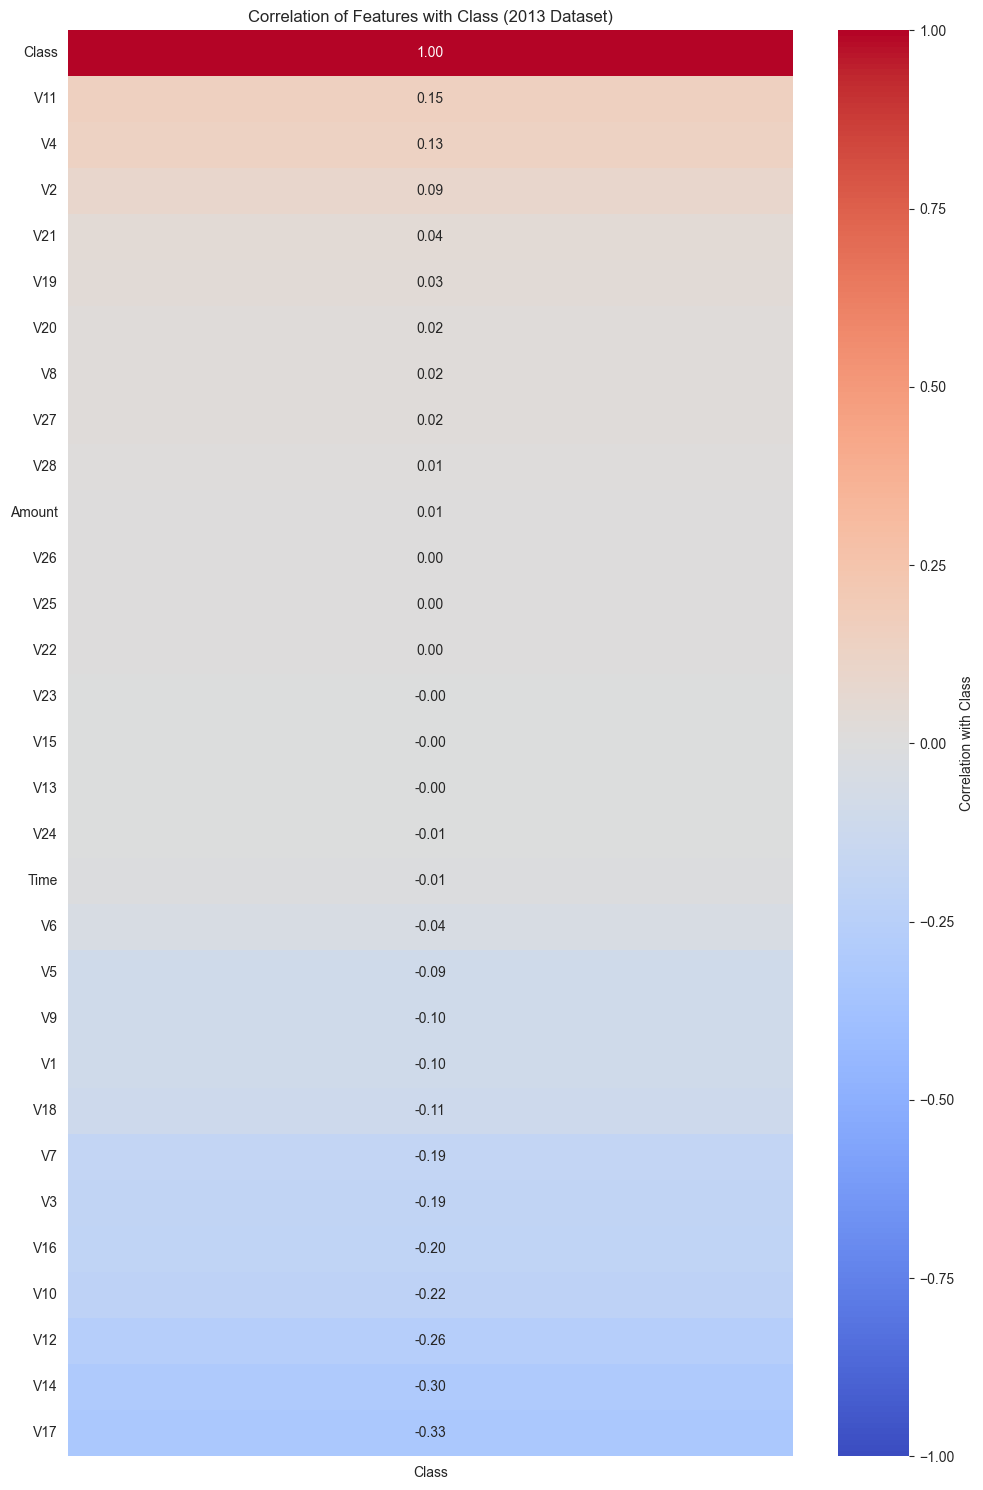

In [15]:
# Plot heatmap focusing on correlations with 'Class'
plt.figure(figsize=(10, 15))
sns.heatmap(full_correlation_matrix[['Class']].sort_values(by='Class', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation with Class'})
plt.title('Correlation of Features with Class (2013 Dataset)')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('figures/correlation_heatmap_2013.png')
plt.show()

In [16]:
# Top correlated features with 'Class' (absolute value)
print("\nTop Features most correlated with 'Class' (absolute value):")
# Exclude 'Class' itself from the list for more meaningful top features
top_correlated_features = full_correlation_matrix['Class'].abs().sort_values(ascending=False)
print(top_correlated_features[top_correlated_features.index != 'Class'])

print("\nInsight: V17, V14, V12, V10, V16, V3 show the strongest negative correlations with 'Class', while V4, V11, V2 are positively correlated. These features are likely strong predictors of fraud.")

print("\n" + "="*80 + "\n")


Top Features most correlated with 'Class' (absolute value):
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64

Insight: V17, V14, V12, V10, V16, V3 show the strongest negative correlations with 'Class', while V4, V11, V2 are positively correlated. These features are likely strong predictors of fraud.




Temporal Patterns (Fraud Count by Hour)

--- 7. Temporal Patterns (Fraud Count by Hour) ---


C:\Users\PAVITHRAN\AppData\Local\Temp\ipykernel_25580\2803133484.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_hour = df_2013[df_2013['Class'] == 1].groupby(pd.cut(df_2013['Time_Hour'], bins=48)).size()


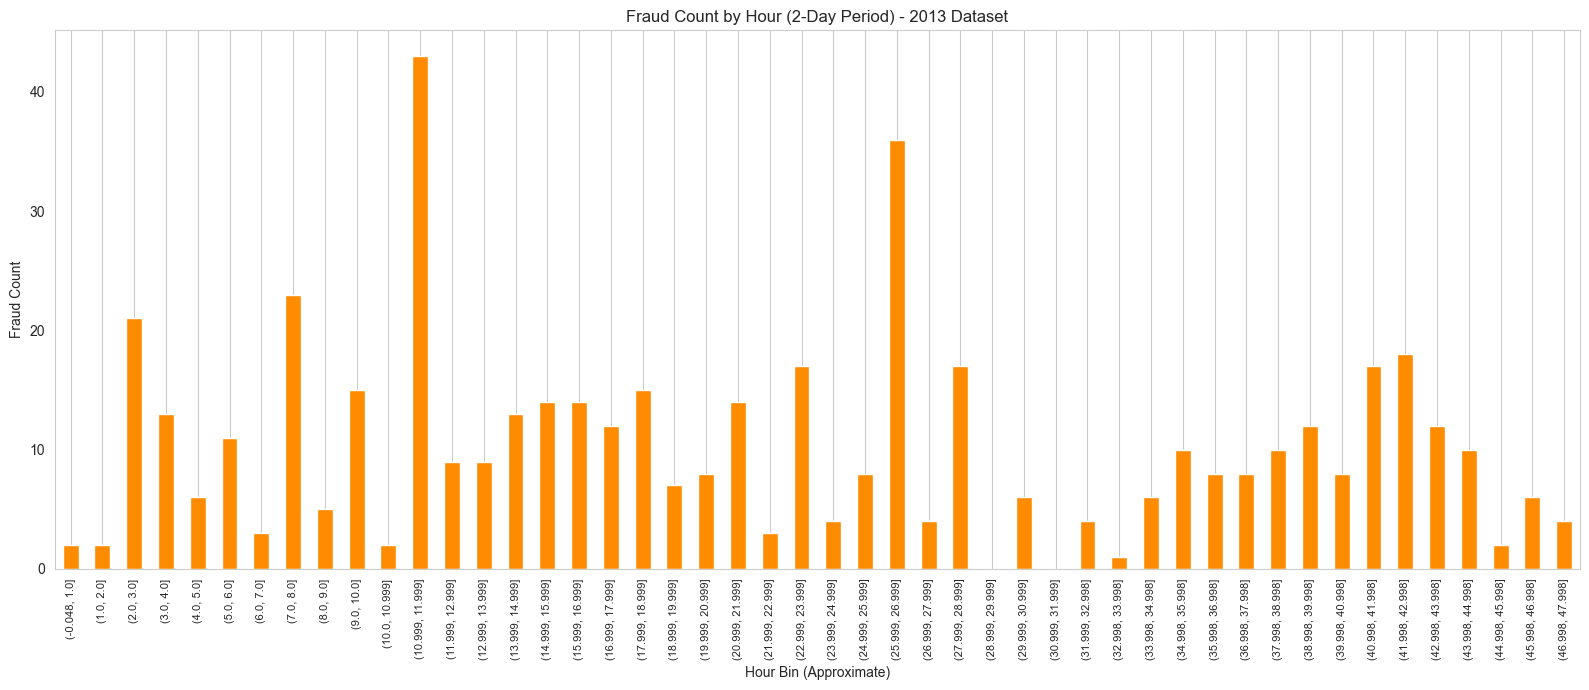


Insight: Fraudulent transactions are not uniformly distributed throughout the 2-day period. There appear to be peaks in fraud activity around specific hours (e.g., around hours 10-12, and 25-28, which translates to certain times of day across the two days). This temporal pattern could be a useful feature.




In [17]:
# --- 7. Temporal Patterns (Fraud Count by Hour) ---
print("--- 7. Temporal Patterns (Fraud Count by Hour) ---")
# Convert Time to hours and create 'Time_Hour' feature
df_2013['Time_Hour'] = df_2013['Time'] / 3600

# Group fraud transactions by hour bins for better visualization over 2-day period
# Using 1-hour bins (48 bins for 2 days)
fraud_by_hour = df_2013[df_2013['Class'] == 1].groupby(pd.cut(df_2013['Time_Hour'], bins=48)).size()

plt.figure(figsize=(16, 7))
fraud_by_hour.plot(kind='bar', color='darkorange')
plt.title('Fraud Count by Hour (2-Day Period) - 2013 Dataset')
plt.xlabel('Hour Bin (Approximate)')
plt.ylabel('Fraud Count')
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('figures/fraudCountByHour_2023.png')
plt.show()

print("\nInsight: Fraudulent transactions are not uniformly distributed throughout the 2-day period. There appear to be peaks in fraud activity around specific hours (e.g., around hours 10-12, and 25-28, which translates to certain times of day across the two days). This temporal pattern could be a useful feature.")
# Drop the created 'Time_Hour' column as it's for EDA visualization and not part of original features
df_2013 = df_2013.drop('Time_Hour', axis=1)

print("\n" + "="*80 + "\n")

Statistical Tests (T-test for selected V features between Classes)

In [18]:
# --- 8. Statistical Tests (T-test for selected V features between Classes) ---
print("--- 8. Statistical Tests (T-test for selected V features between Classes) ---")
# Perform T-tests for highly correlated V features
features_for_ttest = ['V1', 'V4', 'V10', 'V12', 'V14', 'V17'] # Based on correlation insights

for feature in features_for_ttest:
    legitimate_values = df_2013[df_2013['Class'] == 0][feature]
    fraud_values = df_2013[df_2013['Class'] == 1][feature]
    t_stat, p_val = ttest_ind(legitimate_values, fraud_values, equal_var=False) # Welch's t-test for unequal variances
    print(f"T-test for {feature}: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}")
    if p_val < 0.05:
        print(f"   -> Statistically significant difference between legitimate and fraud for {feature}.")
    else:
        print(f"   -> No statistically significant difference between legitimate and fraud for {feature}.")
print("\nInsight: T-tests confirm that several PCA features have statistically significant different means between legitimate and fraudulent transactions, reinforcing their predictive power.")

print("\n" + "="*80 + "\n")
print("--- EDA for creditcard.csv (2013) Complete ---")

--- 8. Statistical Tests (T-test for selected V features between Classes) ---
T-test for V1: t-statistic = 15.6291, p-value = 5.4916e-45
   -> Statistically significant difference between legitimate and fraud for V1.
T-test for V4: t-statistic = -35.1164, p-value = 4.5873e-136
   -> Statistically significant difference between legitimate and fraud for V4.
T-test for V10: t-statistic = 25.7553, p-value = 3.3829e-93
   -> Statistically significant difference between legitimate and fraud for V10.
T-test for V12: t-statistic = 29.8800, p-value = 1.4813e-112
   -> Statistically significant difference between legitimate and fraud for V12.
T-test for V14: t-statistic = 36.2010, p-value = 1.0402e-140
   -> Statistically significant difference between legitimate and fraud for V14.
T-test for V17: t-statistic = 21.2477, p-value = 1.5581e-71
   -> Statistically significant difference between legitimate and fraud for V17.

Insight: T-tests confirm that several PCA features have statistically signi